# Label Engineering

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
import seaborn as sns

In [6]:
df_members = pd.read_csv('data/members_filtered.csv')
df_transactions = pd.read_csv('data/transactions_filtered.csv')
print(f"members:{df_members.shape}")
print(f"transactions:{df_transactions.shape}")

members:(300000, 7)
transactions:(3406383, 10)


In [7]:
df_logs = pd.read_csv('data/user_logs_filtered.csv')
print(f"logs:{df_logs.shape}")

logs:(61325062, 10)


In [8]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3406383 entries, 0 to 3406382
Data columns (total 10 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   Unnamed: 0              int64 
 1   msno                    object
 2   payment_method_id       int64 
 3   payment_plan_days       int64 
 4   plan_list_price         int64 
 5   actual_amount_paid      int64 
 6   is_auto_renew           int64 
 7   transaction_date        int64 
 8   membership_expire_date  int64 
 9   is_cancel               int64 
dtypes: int64(9), object(1)
memory usage: 259.9+ MB


In [9]:
df_transactions = df_transactions.iloc[:, 1:]
df_transactions['transaction_date']=pd.to_datetime(df_transactions['transaction_date'], format='%Y%m%d')
df_transactions['membership_expire_date']=pd.to_datetime(df_transactions['membership_expire_date'], format='%Y%m%d')
df_transactions = df_transactions.sort_values(by=['msno','transaction_date'])
df_transactions

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
1245059,++3Z+W8OPnpbHYfrKwqRKN1bF83XEbxjdYUolhGdHZg=,41,30,149,149,1,2015-01-08,2015-02-09,0
3046991,++3Z+W8OPnpbHYfrKwqRKN1bF83XEbxjdYUolhGdHZg=,41,30,149,149,1,2015-02-08,2015-03-09,0
1946519,++3Z+W8OPnpbHYfrKwqRKN1bF83XEbxjdYUolhGdHZg=,41,30,149,149,1,2015-03-08,2015-04-09,0
504358,++3Z+W8OPnpbHYfrKwqRKN1bF83XEbxjdYUolhGdHZg=,41,30,149,149,1,2015-04-08,2015-05-09,0
1623538,++3Z+W8OPnpbHYfrKwqRKN1bF83XEbxjdYUolhGdHZg=,41,0,0,129,1,2015-05-04,2015-06-09,0
...,...,...,...,...,...,...,...,...,...
734725,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,39,30,149,149,1,2016-11-30,2017-01-24,0
277316,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,39,30,149,149,1,2016-12-31,2017-02-24,0
298762,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,39,30,149,149,1,2017-01-31,2017-03-24,0
3398488,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,39,30,149,149,1,2017-02-28,2017-04-24,0


In [10]:
filtered_msno = df_transactions.groupby('msno')['is_cancel'].agg(set).reset_index()
filtered_msno = filtered_msno[filtered_msno['is_cancel'] == {0, 1}]
filtered_msno

,msno,is_cancel
0,++3Z+W8OPnpbHYfrKwqRKN1bF83XEbxjdYUolhGdHZg=,"{0, 1}"
2,++5nB0VuUuyj9xlngqv3OKUrmQXWZkO5QtB9FYXWTok=,"{0, 1}"
3,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,"{0, 1}"
4,++8dXbkKMJ0rXwUc/m19lTVokEl3c9EfRKWmV6qP9jg=,"{0, 1}"
5,++BQyzVEMoHru900mTyAKpCsKYjXUGdAXylmmiPsbVY=,"{0, 1}"
...,...,...
189623,zzwsW1MnZalh6V5BwYE+V6hFWyKJYOf+rFd+SWVXxp8=,"{0, 1}"
189624,zzx4MmvaZjgHvBcOfqPX4PZPpo1FBuOrCbJMn+g9g7E=,"{0, 1}"
189625,zzx4hKiyR9XFEGAr7SAjcCPbKJCZ+IqegWL7dPjPwZk=,"{0, 1}"
189626,zzyHq6TK2+cBkeGFUHvh12Z7UxFZiSM7dOOSllSBPDw=,"{0, 1}"


In [11]:
filtered_transactions = df_transactions[df_transactions['msno'].isin(filtered_msno['msno'])]
filtered_transactions

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
1245059,++3Z+W8OPnpbHYfrKwqRKN1bF83XEbxjdYUolhGdHZg=,41,30,149,149,1,2015-01-08,2015-02-09,0
3046991,++3Z+W8OPnpbHYfrKwqRKN1bF83XEbxjdYUolhGdHZg=,41,30,149,149,1,2015-02-08,2015-03-09,0
1946519,++3Z+W8OPnpbHYfrKwqRKN1bF83XEbxjdYUolhGdHZg=,41,30,149,149,1,2015-03-08,2015-04-09,0
504358,++3Z+W8OPnpbHYfrKwqRKN1bF83XEbxjdYUolhGdHZg=,41,30,149,149,1,2015-04-08,2015-05-09,0
1623538,++3Z+W8OPnpbHYfrKwqRKN1bF83XEbxjdYUolhGdHZg=,41,0,0,129,1,2015-05-04,2015-06-09,0
...,...,...,...,...,...,...,...,...,...
734725,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,39,30,149,149,1,2016-11-30,2017-01-24,0
277316,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,39,30,149,149,1,2016-12-31,2017-02-24,0
298762,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,39,30,149,149,1,2017-01-31,2017-03-24,0
3398488,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,39,30,149,149,1,2017-02-28,2017-04-24,0


In [19]:
filtered_transactions = filtered_transactions.sort_values(by=['msno', 'transaction_date']).reset_index(drop=True)
result = []

for msno, group in filtered_transactions.groupby('msno'):
    group = group.sort_values(by='transaction_date')
    
    # find the first record of is_cancel = 1 for each msno
    cancel_record = group[group['is_cancel'] == 1].iloc[0] if (group['is_cancel'] == 1).any() else None
    
    if cancel_record is not None:
        # find the first record of is_cancel = 0 after the is_cancel = 1 record for each msno
        after_cancel = group[group['transaction_date'] >= cancel_record['transaction_date']]
        resume_record = after_cancel[after_cancel['is_cancel'] == 0].iloc[0] if (after_cancel['is_cancel'] == 0).any() else None
        
        if resume_record is not None:
            if resume_record['membership_expire_date'] >= cancel_record['membership_expire_date']:
                days_diff = (resume_record['transaction_date'] - cancel_record['membership_expire_date']).days
                result.append({
                    'msno': msno,
                    'expire_date': cancel_record['membership_expire_date'],
                    'resume_date': resume_record['transaction_date'],
                    'days_diff': days_diff
                })

result_df = pd.DataFrame(result)
result_df.loc[result_df['days_diff'] < 0, 'days_diff'] = 0
result_df

,msno,expire_date,resume_date,days_diff
0,++3Z+W8OPnpbHYfrKwqRKN1bF83XEbxjdYUolhGdHZg=,2015-06-04,2015-05-04,0
1,++5nB0VuUuyj9xlngqv3OKUrmQXWZkO5QtB9FYXWTok=,2016-03-04,2016-03-12,8
2,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,2015-06-14,2015-06-22,8
3,++8dXbkKMJ0rXwUc/m19lTVokEl3c9EfRKWmV6qP9jg=,2016-08-05,2016-08-05,0
4,++BQyzVEMoHru900mTyAKpCsKYjXUGdAXylmmiPsbVY=,2015-12-29,2015-12-28,0
...,...,...,...,...
150656,zzwsW1MnZalh6V5BwYE+V6hFWyKJYOf+rFd+SWVXxp8=,2015-11-05,2015-10-09,0
150657,zzx4MmvaZjgHvBcOfqPX4PZPpo1FBuOrCbJMn+g9g7E=,2015-07-13,2015-11-06,116
150658,zzx4hKiyR9XFEGAr7SAjcCPbKJCZ+IqegWL7dPjPwZk=,2016-12-19,2016-12-19,0
150659,zzyHq6TK2+cBkeGFUHvh12Z7UxFZiSM7dOOSllSBPDw=,2015-05-14,2015-05-15,1


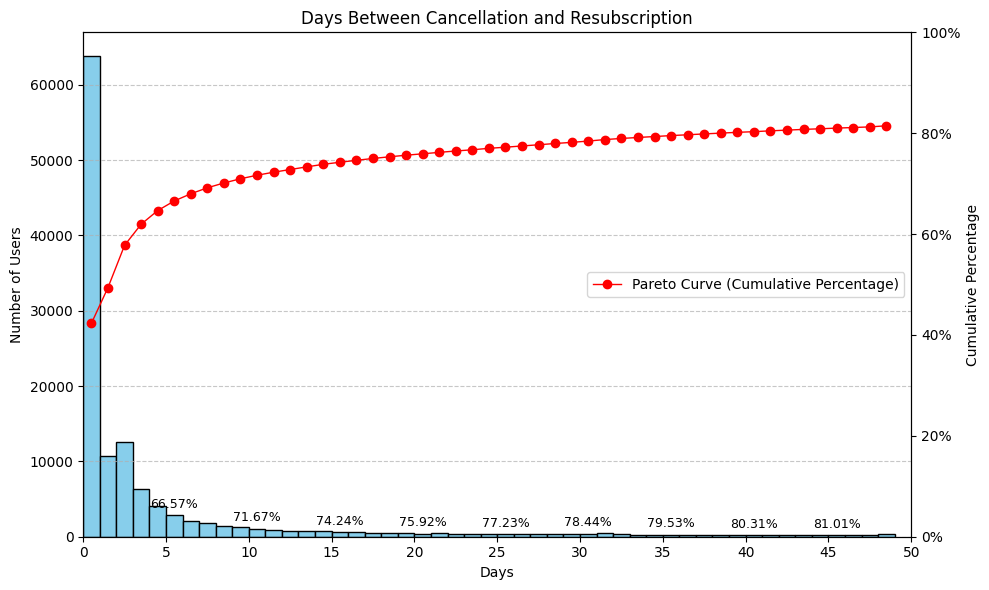

In [26]:
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(result_df['days_diff'], bins=range(0, 50), color='skyblue', edgecolor='black')

plt.xlim(0, 50)
plt.xticks(range(0, 51, 5))
plt.title('Days Between Cancellation and Resubscription')
plt.xlabel('Days')
plt.ylabel('Number of Users')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

total_count = len(result_df)
x_ticks_to_label = [5, 10, 15, 20, 25, 30, 35, 40, 45]

for x in x_ticks_to_label:
    if x >= len(bins):
        continue
    
    count_less_than_x = result_df[result_df['days_diff'] <= x].shape[0]
    proportion = count_less_than_x / total_count

    bin_index = x  
    patch = patches[bin_index]  
    
    height = patch.get_height()
    bin_center = 0.5 * (bins[bin_index] + bins[bin_index + 1])

    plt.text(
        bin_center,
        height + 1000, 
        f'{proportion:.2%}',
        ha='center',
        fontsize=9,
        rotation=0
    )


ax2 = plt.twinx()
cumulative_n = n.cumsum()
cumulative_percentage = cumulative_n / total_count
bin_centers = (bins[:-1] + bins[1:]) / 2
ax2.plot(bin_centers, cumulative_percentage, color='red', marker='o', linestyle='-', linewidth=1, label='Pareto Curve (Cumulative Percentage)')
ax2.set_ylim(0, 1) 
ax2.set_ylabel('Cumulative Percentage')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
lines, labels = ax2.get_legend_handles_labels()
plt.legend(lines, labels, loc='center right')

plt.tight_layout()
plt.show()

In [15]:
bins = [-1, 5, np.inf]  
labels = [0, 1]  
result_df['label'] = pd.cut(result_df['days_diff'], bins=bins, labels=labels, right=True)
result_df

,days_diff,label
0,0,0
1,0,0
2,2,0
3,2,0
4,2,0
...,...,...
67995,37,1
67996,31,1
67997,37,1
67998,47,1


In [16]:
filtered_msno['label'] = 1
filtered_msno.set_index('msno', inplace=True)
filtered_msno = filtered_msno.drop('is_cancel', axis=1)
filtered_msno

,label
msno,
++3Z+W8OPnpbHYfrKwqRKN1bF83XEbxjdYUolhGdHZg=,1
++5nB0VuUuyj9xlngqv3OKUrmQXWZkO5QtB9FYXWTok=,1
++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,1
++8dXbkKMJ0rXwUc/m19lTVokEl3c9EfRKWmV6qP9jg=,1
++BQyzVEMoHru900mTyAKpCsKYjXUGdAXylmmiPsbVY=,1
...,...
zzwsW1MnZalh6V5BwYE+V6hFWyKJYOf+rFd+SWVXxp8=,1
zzx4MmvaZjgHvBcOfqPX4PZPpo1FBuOrCbJMn+g9g7E=,1
zzx4hKiyR9XFEGAr7SAjcCPbKJCZ+IqegWL7dPjPwZk=,1


In [17]:
print(filtered_msno.isnull().sum())
print(result_df.isnull().sum())
print(filtered_msno.dtypes)
print(result_df.dtypes)

label    0
dtype: int64
days_diff    0
label        0
dtype: int64
label    int64
dtype: object
days_diff       int32
label        category
dtype: object


In [18]:
result_df.set_index('msno', inplace=True)
result_df['label'] = result_df['label'].astype(int)
result_df

KeyError: "None of ['msno'] are in the columns"

In [ ]:
filtered_msno.update(result_df[['label']])
filtered_msno['label'] = filtered_msno['label'].astype(int)
filtered_msno

,label
msno,
++3Z+W8OPnpbHYfrKwqRKN1bF83XEbxjdYUolhGdHZg=,0
++5nB0VuUuyj9xlngqv3OKUrmQXWZkO5QtB9FYXWTok=,1
++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,1
++8dXbkKMJ0rXwUc/m19lTVokEl3c9EfRKWmV6qP9jg=,0
++BQyzVEMoHru900mTyAKpCsKYjXUGdAXylmmiPsbVY=,0
...,...
zzwsW1MnZalh6V5BwYE+V6hFWyKJYOf+rFd+SWVXxp8=,0
zzx4MmvaZjgHvBcOfqPX4PZPpo1FBuOrCbJMn+g9g7E=,1
zzx4hKiyR9XFEGAr7SAjcCPbKJCZ+IqegWL7dPjPwZk=,0


In [ ]:
df_members['label'] = 0
df_members.set_index('msno', inplace=True)
label = df_members[['label']]
label

,label
msno,
2dwuk0KQUnCnRvFnDGFyIslHLqG8lFHkyOvfRNwc5XI=,0
Bx13MoR+nVJVVDsatg3fxInFupmO1jSzdkFKMA976t8=,0
2ouWnOhbWxdFyjEy8qx/8lr15OzZ0PX9tr6xZP4Ihns=,0
QvZtxnHz7yGh07QiFuq0RN1hL5WrzcbKlQTUiroEEyE=,0
CUFR22oaKwIwzj4VMey3Mj76B5zawuo2PxsWheNfQ6Q=,0
...,...
u2ZFhHBKeaNkXR5IWV88Id6zd5U6tc7Oxv/kVZ1ZQ/s=,0
Z3QAHHe2PwgA1TZM7aN7yIO4M6OoT2xdvccutBe6SmE=,0
Ut82CPYSqaueUjOrv47f9knp2qKcGGUTj3h+oXFBCy8=,0


In [ ]:
label.update(filtered_msno[['label']])
label.reset_index(inplace=True)
label['label'] = label['label'].astype(int)
label

C:\Users\suxin\AppData\Local\Temp\ipykernel_2860\788662609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label['label'] = label['label'].astype(int)


,msno,label
0,2dwuk0KQUnCnRvFnDGFyIslHLqG8lFHkyOvfRNwc5XI=,0
1,Bx13MoR+nVJVVDsatg3fxInFupmO1jSzdkFKMA976t8=,0
2,2ouWnOhbWxdFyjEy8qx/8lr15OzZ0PX9tr6xZP4Ihns=,0
3,QvZtxnHz7yGh07QiFuq0RN1hL5WrzcbKlQTUiroEEyE=,1
4,CUFR22oaKwIwzj4VMey3Mj76B5zawuo2PxsWheNfQ6Q=,0
...,...,...
299995,u2ZFhHBKeaNkXR5IWV88Id6zd5U6tc7Oxv/kVZ1ZQ/s=,0
299996,Z3QAHHe2PwgA1TZM7aN7yIO4M6OoT2xdvccutBe6SmE=,0
299997,Ut82CPYSqaueUjOrv47f9knp2qKcGGUTj3h+oXFBCy8=,0
299998,S84wwJdls1Zzv7+dKkhVgU1bbL6Laoo/tPNdFmzHlaA=,0


In [ ]:
label.to_csv('data/label.csv')